# Insight on Global Warming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [4]:
data.dropna(axis=0 , inplace=True)

In [5]:
data["Month"]=data["dt"].map(lambda x:int(x.split("-")[1]))

In [6]:
data["Year"]=data["dt"].map(lambda x:int(x.split("-")[0]))

In [7]:
data.drop(axis=1 ,labels="dt" ,inplace=True)

In [8]:
data.drop(axis=1 ,labels="AverageTemperatureUncertainty" ,inplace=True)

In [9]:
bangalore_avg=data[data["City"]=="Bangalore"].groupby("Year").mean()["AverageTemperature"]

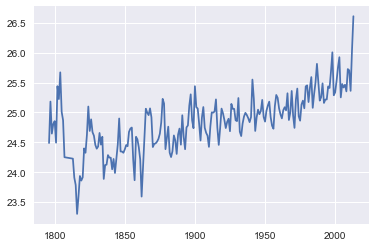

In [10]:
plt.plot(bangalore_avg)

In [11]:
def group_a_month(city,mon):
    tmp=data[(data["City"]==city) & (data["Month"]==mon)][["Year" , "AverageTemperature"]]
    tmp.set_index("Year" ,inplace="True")
    return tmp

In [16]:
def group_all_months(city):
    month=[]
    month.append(0);
    for i in range(1,13):
        month.append(group_a_month(city,i))
    return month    
    
        
    

In [25]:
def group_all_cities():
    cities={}
    for city in data["City"].unique():
        cities[city]=group_all_months(city)
        
    return cities

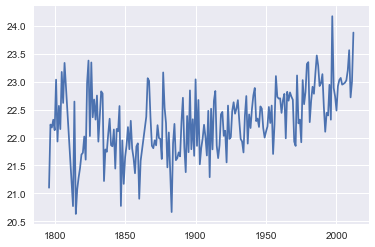

In [26]:
plt.plot(group_all_months("Bangalore")[12])

In [46]:
def plot_a_city(city):
    fig,axes =plt.subplots(nrows=12 ,ncols=1,figsize=(13,70))
    for i in range(0,12):
        axes[i].plot(city[i+1])
        axes[i].set_xlabel("Years")
        axes[i].set_ylabel("Temperature")
        axes[i].set_title("Month " + str(i+1))
        
    

In [41]:
data_set=group_all_cities()

In [42]:
data["City"].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam', 'Delhi',
       'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh', 'Guangzhou',
       'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad', 'Ibadan',
       'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah', 'Jinan',
       'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa', 'Lagos',
       'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles', 'Luanda',
       'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne', 'Mexico',
       'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur', 'Nairobi',
       'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking', 'Pune',
       'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

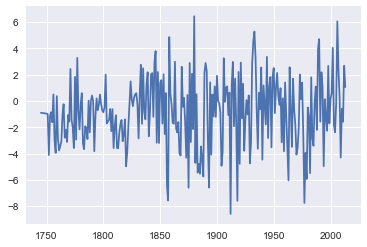

In [44]:
plt.plot(data_set["Chicago"][1])

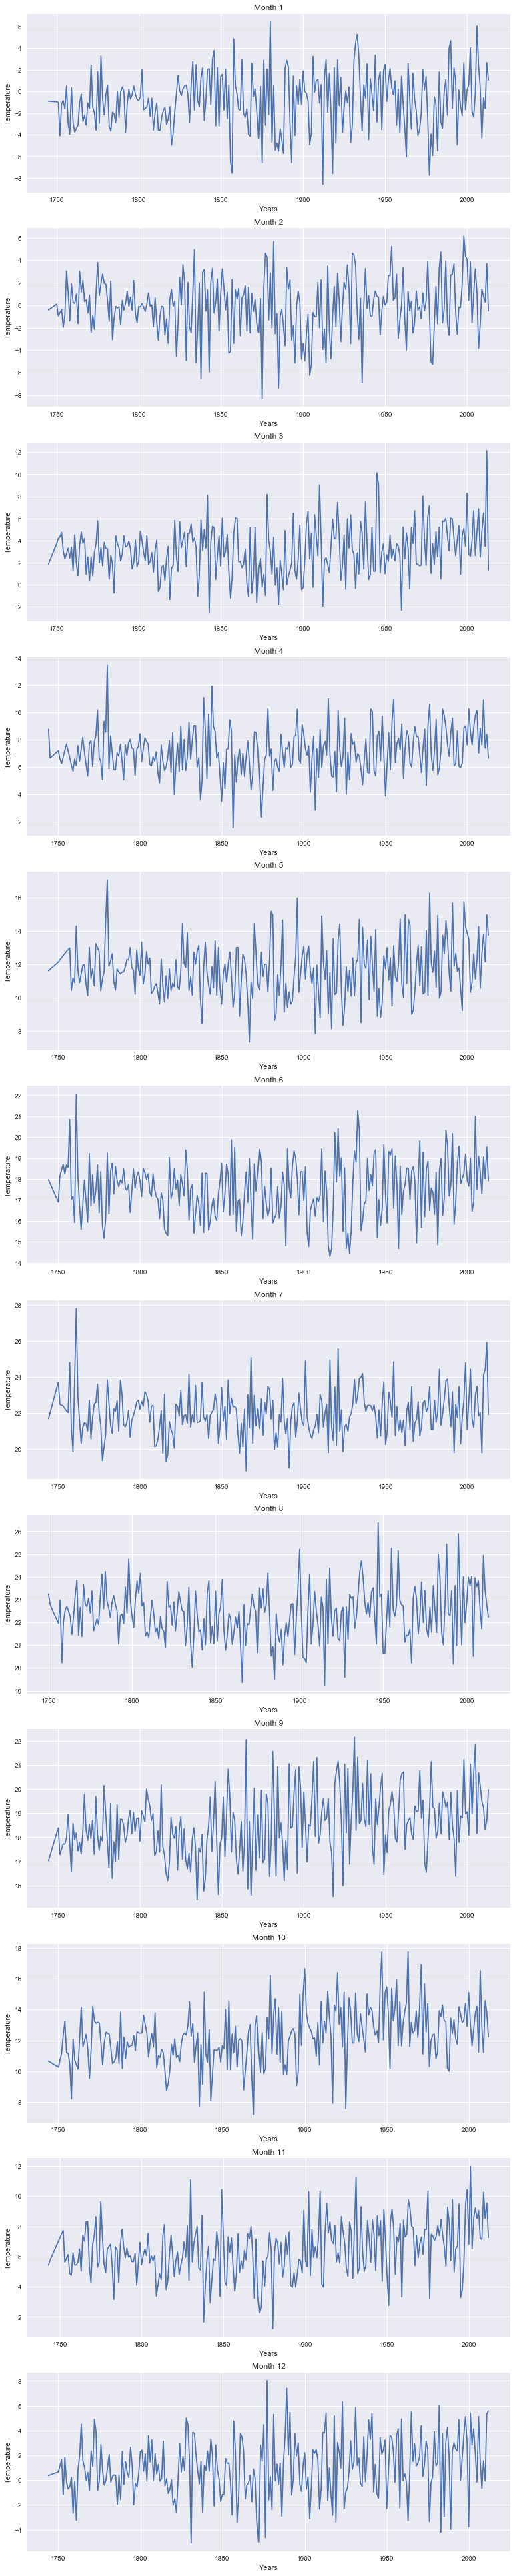

In [47]:
plot_a_city(data_set["Chicago"])

SyntaxError: invalid syntax (<ipython-input-48-d862a81d4b33>, line 1)